<a href="https://colab.research.google.com/github/SeamusWhoriskey/ELEC301PROJ1/blob/master/Project1_Hadamard_and_Haar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import scipy.io as sc
from scipy import signal
import numpy as np
import math
import matplotlib
import matplotlib.image as im
import matplotlib.pyplot as plt
import time
import struct
from sklearn.metrics.pairwise import  cosine_similarity

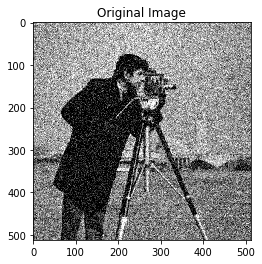

In [4]:
image = im.imread('/content/drive/My Drive/FALL 2020/Signals/Colab Notebooks/cameraman_025.png')
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.title('Original Image')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# image = [] #get from matlab(?)
had_trans_image = np.zeros(image.shape) 
N,M = image.shape #can be N != M image, doesn't have to be square

[[0.7647059  0.63921571 0.69411767 ... 0.42352942 0.48235294 0.71764708]
 [0.36862746 0.63529414 0.30980393 ... 0.54901963 0.36470589 0.74901962]
 [0.41568628 0.50980395 0.50588238 ... 0.50196081 0.7019608  0.77254903]
 ...
 [0.45490196 0.32549021 0.56078434 ... 0.58039218 0.57254905 0.43921569]
 [0.63921571 0.26274511 0.76862746 ... 0.26274511 0.32156864 0.29411766]
 [0.66274512 0.28235295 0.06666667 ... 0.69803923 0.52156866 0.67058825]]


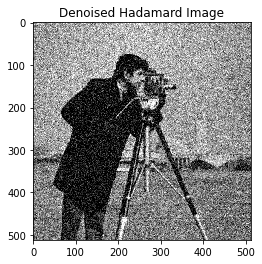

In [12]:
#HADAMARD TRANSFORM


#image = np.array([[1,7],[3,3]]) #test matrix
# print(image)

#N = 2 #test dimension

Hd = np.zeros((N,N))

scalar = 2 ** (-math.log(N,2)/2) #to make it orthonormal (magnitude of each basis vector is 1)

#fill in Hadamard with (scaled) 1's or -1's
for i in range(0,len(Hd)):
  for j in range(0,len(Hd)):
    if (bin(i&j).count("1")%2==0): #sum of bitwise and between i and j
      Hd[i,j] = scalar #1*magnitude (because even exponent)
    else:
      Hd[i,j] = -scalar #-1*magnitude (because odd exponent)


# print(H)

#Matrix multiplication to change the basis to Hadamard

had_trans_image = np.matmul(Hd, image)

# print(had_trans_image)

#thresholding each element in matrix of Hadamard basis

t = 0 #threshold value

thresholded_had = had_trans_image

#hard thresholding:

thresholded_had[abs(thresholded_had)<t] = 0.0

#soft thresholding: (uncomment the following two lines)

#thresholded_had[np.sign(thresholded_had)>0] = thresholded_had[np.sign(thresholded_had)>0] - t
#thresholded_had[np.sign(thresholded_had)<0] = thresholded_had[np.sign(thresholded_had)<0] + t

#inverse Hadamard which is same forward and backward because it is unitary (transpose is itself)

denoised_had_image = np.matmul(Hd, thresholded_had)



print(denoised_had_image)


      
plt.imshow(denoised_had_image, interpolation='nearest', cmap='gray')
plt.title('Denoised Hadamard Image')
plt.show()

[[0.7647059  0.63921571 0.69411767 ... 0.42352942 0.48235294 0.71764708]
 [0.36862746 0.63529414 0.30980393 ... 0.54901963 0.36470589 0.74901962]
 [0.41568628 0.50980395 0.50588238 ... 0.50196081 0.7019608  0.77254903]
 ...
 [0.45490196 0.32549021 0.56078434 ... 0.58039218 0.57254905 0.43921569]
 [0.63921571 0.26274511 0.76862746 ... 0.26274511 0.32156864 0.29411766]
 [0.66274512 0.28235295 0.06666667 ... 0.69803923 0.52156866 0.67058825]]


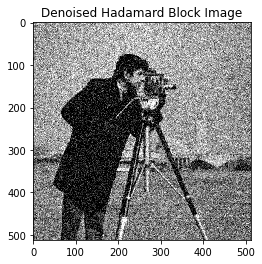

In [19]:
#HADAMARD BLOCK TRANSFORM


HdB = np.zeros((N,N))

scalar = 2 ** (-math.log(N,2)/2) #to make it orthonormal (magnitude of each basis vector is 1)

#fill in Hadamard with (scaled) 1's or -1's
for i in range(0,len(HdB)):
  for j in range(0,len(HdB)):
    if (bin(i&j).count("1")%2==0): #sum of bitwise and between i and j
      HdB[i,j] = scalar #1*magnitude (even exponent)
    else:
      HdB[i,j] = -scalar #-1*magnitude (odd exponent)

had_trans_BLOCK_image = np.zeros(image.shape)

#Matrix multiplication on each block to change the basis to Hadamard

for i in range(0,image.shape[0]-N+1,N): #for each row in image, skipping by Ns
    for j in range(0, image.shape[1]-N+1,N): #for each column in image, skipping by Ns
        had_trans_BLOCK_image[i:i+N,j:j+N] = np.matmul(HdB,image) 

#thresholding each element in matrix block of Hadamard basis

tb = 0 #threshold value


thresholded_had_BLOCK = had_trans_BLOCK_image

#hard thresholding:

thresholded_had_BLOCK[abs(thresholded_had_BLOCK)<tb] = 0.0

#soft thresholding: (uncomment the following two lines)

#thresholded_had_BLOCK[np.sign(thresholded_had_BLOCK)>0] = thresholded_had_BLOCK[np.sign(thresholded_had_BLOCK)>0] - tb
#thresholded_had_BLOCK[np.sign(thresholded_had_BLOCK)<0] = thresholded_had_BLOCK[np.sign(thresholded_had_BLOCK)<0] + tb


denoised_had_BLOCK_image = np.zeros(image.shape)

#inverse Hadamard for each block

for i in range(0,image.shape[0]-N+1,N): #for each row in image, skipping by Ns
    for j in range(0, image.shape[1]-N+1,N): #for each column in image, skipping by Ns
        denoised_had_BLOCK_image[i:i+N,j:j+N] = np.matmul(HdB,thresholded_had_BLOCK) 



print(denoised_had_BLOCK_image)

plt.imshow(denoised_had_BLOCK_image, interpolation='nearest', cmap='gray')
plt.title('Denoised Hadamard Block Image')
plt.show()


[[12.47436915 12.1232421  12.69447347 ... 11.62636094 11.47922034
  11.7036574 ]
 [ 1.30173507  1.54298329  1.46949965 ...  1.31092055  1.43379768
   1.55667483]
 [-0.08039217 -0.13946077 -0.15465686 ...  0.22941178  0.17205881
   0.35245099]
 ...
 [ 0.13587543 -0.28561569  0.08041606 ...  0.11091873 -0.06932419
  -0.04159452]
 [ 0.04714047  0.03327561  0.03604858 ... -0.13587543 -0.18301588
  -0.171924  ]
 [-0.01663781 -0.01386484  0.49636124 ... -0.30779943 -0.14142137
  -0.26620491]]
[[0.7647059  0.63921571 0.69411767 ... 0.42352942 0.48235294 0.71764708]
 [0.36862746 0.63529414 0.30980393 ... 0.54901963 0.36470589 0.74901962]
 [0.41568628 0.50980395 0.50588238 ... 0.50196081 0.7019608  0.77254903]
 ...
 [0.45490196 0.32549021 0.56078434 ... 0.58039218 0.57254905 0.43921569]
 [0.63921571 0.26274511 0.76862746 ... 0.26274511 0.32156864 0.29411766]
 [0.66274512 0.28235295 0.06666667 ... 0.69803923 0.52156866 0.67058825]]


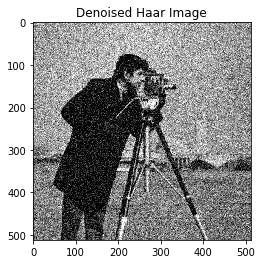

In [17]:
#HAAR TRANSFORM


Hr = np.zeros((N,N)) #haar matrix to fill in

#first row is all ones
for p in range(N):
  Hr[0,p] = 1/(math.sqrt(N)) #normalized top row

j = 1 #j is the max row number with the same pattern just shifted so for 8 point haar 
      #j = 1 for 1111 -1-1-1-1 (since theres only one row of that) and 
      #j = 2 for 11 -1-1 (since next two rows are that pattern)
      #j = 4 for the 1 -1 (since the last 4 rows are that pattern) 

count = 0 #need to raise 2 to the power of count to get next j for next pattern 1,2,4,8....(see above)

row = 1 #start at second row

#when normalixing i know each scaling depends on what my length is of the pattern so whatever it is 
#the magnitude is square root of that because they are all ones squared like sqrt(1^2 + (-1)^2 + ... length times)

while (j < N): #j should be less than N 
  length = N/(2**count) #length of 11..-1-1.. for each row, it is current j (row max) minus previous j (last row) divided from N
  scale = 1/(math.sqrt(length)) #normalized, divide by magnitude of each pattern (same for each j) (see above)
  i = 0 #column number, set to 0 every time new j for new pattern is created
  while (row <= j):   #go through row max
    for k in range(int(length/2)): #only need to go halfway length filling columns i with ones (scaled) because...
      Hr[row,i] = 1*scale
      Hr[row,int(i+length/2)] = -1*scale #...-1 (scaled) is always the other half, a unit of half total length apart
      i+=1 #next column
    i+=int(length/2) #when going to next row, we only made i go through half the length but the col indices we covered
                     #went to the full length, so add that when moving on
    row+=1  #next row
  count+=1  #next pattern
  j += (2 ** count) #increase j up til the height the next pattern is covered

#print(Hr)

# check if orthonormal
# isidentity = np.matmul(Hr, np.transpose(Hr))
# print(isidentity)

#Matrix multiplication to change the basis to Haar

hr_trans_image = np.matmul(Hr, image)

print(hr_trans_image)

#thresholding each element in matrix of Haar basis

tr = 0 #threshold value


thresholded_hr = hr_trans_image

#hard thresholding:

thresholded_hr[abs(thresholded_hr)<tr] = 0.0

#soft thresholding: (uncomment the following two lines)

#thresholded_hr[np.sign(thresholded_hr)>0] = thresholded_hr[np.sign(thresholded_hr)>0] - tr
#thresholded_hr[np.sign(thresholded_hr)<0] = thresholded_hr[np.sign(thresholded_hr)<0] + tr

#inverse Haar which is the Haar transpose matrix

denoised_hr_image = np.matmul(np.transpose(Hr), thresholded_hr)



print(denoised_hr_image)
plt.imshow(denoised_hr_image, interpolation='nearest', cmap='gray')
plt.title('Denoised Haar Image')
plt.show()

